In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week2data\car_data.csv")

df.head()

,weight,hwy_mpg
0,2548,27
1,2548,27
2,2823,26
3,2337,30
4,2824,22


# Quesiton 1

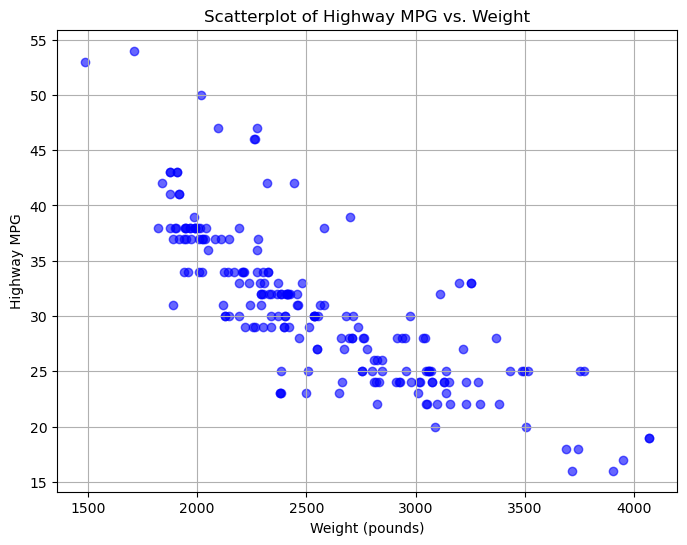

In [3]:
# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['hwy_mpg'], color='blue', alpha=0.6)
plt.title('Scatterplot of Highway MPG vs. Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()


# Question 2

Based on the **scatter plot**, the general trend shows that highway miles per gallon **decrease** as the weight of the car **increases**.

# Question 3

If I were to build a linear model using this data, the slope would be negative. Heavier vehicles generally consume more fuel, resulting in fewer miles per gallon. Thus on the graph, as x (weight) increases, y (hwy_MPG) will generally decrease.

# Question 4

If the slope of the model representing this data is -0.05, it means that for every additional pound of a vehicle's weight, the highway MPG decreases by 0.05.

# Question 5

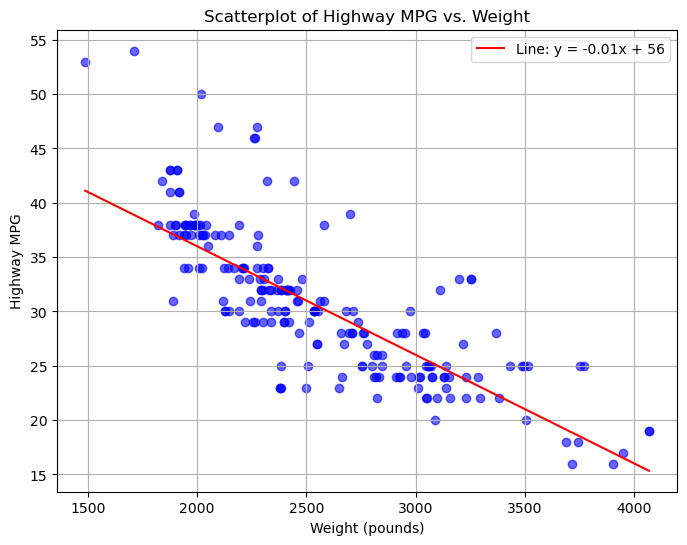


Best Slope = -0.01
Best Intercept = 56


In [11]:
# Triel and Error finding best slope and intercept
slope = -0.01
intercept = 56

# Generating x values (weights) for the trend line
x = np.linspace(df['weight'].min(), df['weight'].max(), 100)

# Calculate corresponding y values (hwy MPG)
y = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['hwy_mpg'], color='blue', alpha=0.6)
plt.plot(x,y, color = 'red', label = f"Line: y = {slope}x + {intercept}")
plt.title('Scatterplot of Highway MPG vs. Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid(True)
plt.show()
print("")

print("Best Slope = -0.01\nBest Intercept = 56")

# Question 6

In [13]:
# Reshape data for Scikit-learn
x2 = df['weight'].values.reshape(-1,1)
y = df['hwy_mpg'].values

# Start to fit the linear regression model
model = LinearRegression()
model.fit(x2, y)

# Get slope & intercept
sklearn_slope = model.coef_[0]
sklearn_intercept = model.intercept_

print(f"Best-fit line: y = {sklearn_slope:.4f}x + {sklearn_intercept:.4f}")

y_pred = model.predict(x2)

Best-fit line: y = -0.0105x + 57.7052


# Question 7

In [15]:
# RMSE for manual line
y_manual = slope * df['weight'] + intercept
rmse_manual = np.sqrt(mean_squared_error(df['hwy_mpg'], y_manual))

# RMSE for Scikit-learn line
rmse_sklearn = np.sqrt(mean_squared_error(df['hwy_mpg'], y_pred))

print(f"RMSE (Manual line): {rmse_manual:.4f}")
print(f"RMSE (Scikit-learn line): {rmse_sklearn:.4f}")

RMSE (Manual line): 4.1659
RMSE (Scikit-learn line): 4.1449


The two RMSE's are closer than I thought they'd be! (Kudos to me & my manual line). However, with the Scikit-learn line being a little lower value, this indicates that it is the better-fitting model line for the data set as its predictions are closer to the actual values, indicating better performance.

# Question 8

In [18]:
# Manual best-fit prediction
manual_prediction = slope * 3200 + intercept

print(f"Manual prediction for 3200 pounds: {manual_prediction:.4f} MPG")

Manual prediction for 3200 pounds: 24.0000 MPG
